# Случайные марковские процессы

Задание: Скачайте текст войны и мир (ссылка на github и гугл диск). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов.

## 1. Война и мир

In [22]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

### Скачайте текст войны и мир. Очистите его, оставив только русские буквы и символы пробела. 

In [23]:
with open('War and piece.txt', 'r') as f:
    text = f.read().lower()
text = re.sub('\W', ' ', text) #забавно, что при подобном преображении удаляется достаточно большая часть книги, так как она на француском

In [24]:
text = re.sub('[a-z]', '', text)
text = re.sub('\d', '', text)
text = re.sub('_', '', text)
text = re.sub('\s{1,}', ' ', text)

In [25]:
text[1:1000]

'ом первый часть первая поместья мой верный раб ну князь генуя и лукка поместья фамилии бонапарте нет я вам вперед говорю если вы мне не скажете что у нас война если вы еще позволите себе защищать все гадости все ужасы этого антихриста право я верю что он антихрист я вас больше не знаю вы уж не друг мой вы уж не мой верный раб как вы говорите франц в дальнейшем переводы с французского не оговариваются здесь и далее все переводы кроме специально оговоренных принадлежат л н толстому ред ну здравствуйте здравствуйте я вижу что я вас пугаю садитесь и рассказывайте так говорила в июле года известная анна павловна шерер фрейлина и приближенная императрицы марии феодоровны встречая важного и чиновного князя василия первого приехавшего на ее вечер анна павловна кашляла несколько дней у нее был грипп как она говорила грипп был тогда новое слово употреблявшееся только редкими в записочках разосланных утром с красным лакеем было написано без различия во всех а или если у вас граф или князь нет в 

######  Постройте матрицу переходных вероятностей. 

In [26]:
RUSSIA = 'йцукенгшщзхъфывапролджэячсмитьбюё '
POS = {l: i for i, l in enumerate(RUSSIA)}

In [27]:
probabilities = np.zeros((len(RUSSIA), len(RUSSIA)))
probabilities

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
for cp, cn in zip(text[1:], text[:-1]):
    probabilities[POS[cp], POS[cn]] += 1

In [29]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [30]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIA), columns=(c for c in RUSSIA))

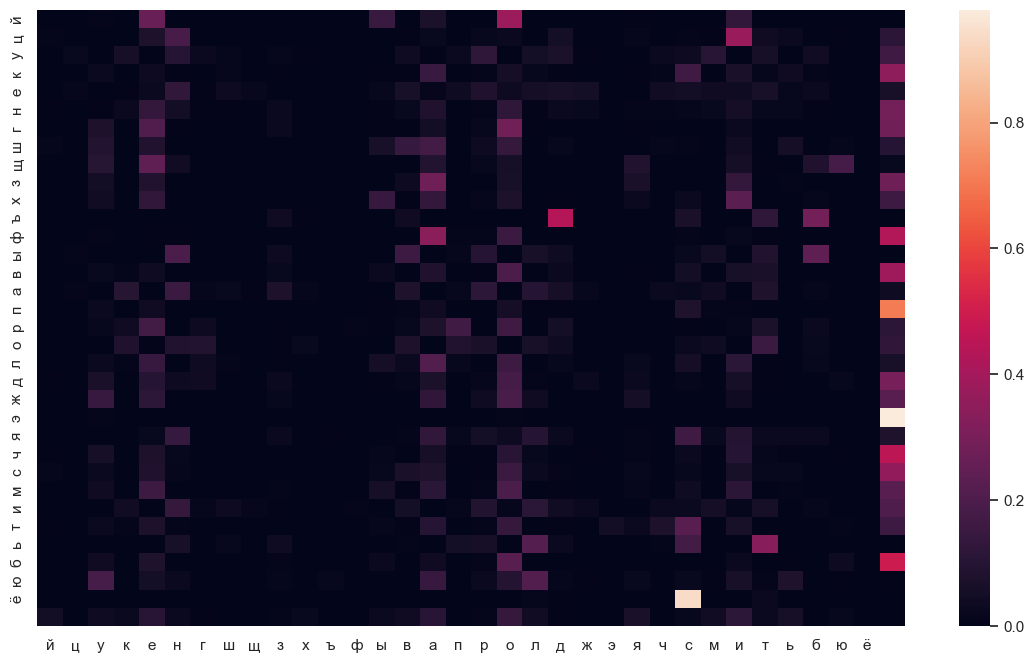

In [31]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

######  Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р

1 способ:

Можно перемножить матрично матрицу саму на себя 4 раза и на пересечении i строки и j столбца будет требуемая вероятность

In [32]:
new_df = df*df*df*df #судя по сказанному на вебинаре, здесь надо использовать обычное умножение, а не матричное
#с матричным получается бессмыслица, я проверила :D

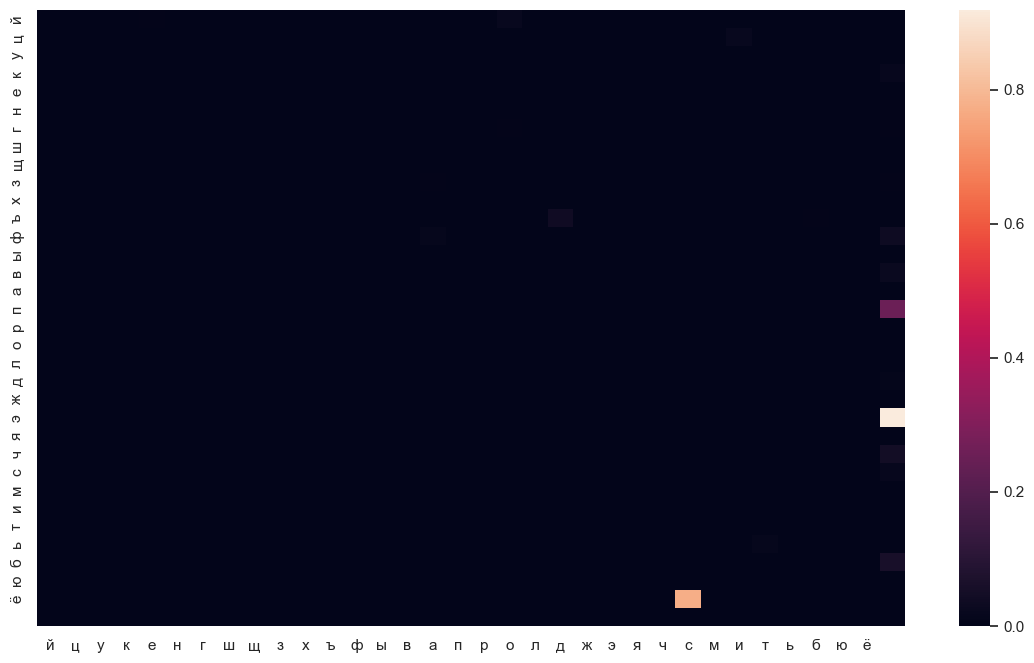

In [33]:
plt.figure(figsize=(14,8))
sns.heatmap(new_df)
plt.show()

In [34]:
new_df.at['п', 'а'] #очень маленькое число

2.1535027478930397e-06

#### Можно попробовать вторым способом по формуле это вычислить:

In [35]:
from functools import reduce
from operator import mul

In [36]:
#п _ _ р
#сколько возможных вариантов? 34**2

start = POS['п']
end = POS['р']
i = 1
for_multiply = []
prior = 1. / len(RUSSIA)
for c in RUSSIA:
#    print(c)
    proba = prior * probabilities[start, POS[c]] 
#    print('Вероятность в первом цикле',proba)
    if proba > 0:
        two_letters = ''.join(['п', c])
#        print('Две буквы с НЕНУЛЕВОЙ вер-ю', two_letters, proba)
        for d in RUSSIA:
#            print('ВЛОЖЕННЫЙ ЦИКЛ',d)
            proba_2 = proba * probabilities[POS[d], end]
#            print('Вер-ть во вложенном цикле', proba_2)
            if proba_2 > 0:
#!!!!               print(''.join([two_letters, d, 'р']), proba_2)
#                   i *= proba_2
                   for_multiply.append(proba_2)
print('ПРОВЕРКА ЗНАЧЕНИЙ В СПИСКЕ\n',for_multiply[0:10])
print('\n------ОТВЕТ-------\n', reduce(mul, for_multiply))



#проверила вывод в помеченной !!! строке, с ним всё хорошо, там нет нулевых значений. 
#Видимо при перемножении такого количества близких к нулю чисел компьютер округляет до 0
#ну либо я ошиблась где-то 🤷‍♀️

ПРОВЕРКА ЗНАЧЕНИЙ В СПИСКЕ
 [1.5120717972113478e-05, 0.0001004595770444994, 6.601753230679046e-06, 6.986259189172915e-05, 9.338534795933931e-06, 1.4831763334736484e-05, 2.7986719954152464e-05, 1.5821279607988865e-05, 2.2686973294201672e-06, 1.0314919850474592e-05]

------ОТВЕТ-------
 0.0


###### Сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов

In [177]:
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIA), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

#здесь интересной задачей кажется сгенерировать слово без вероятности пробела в нём, при этом сохраняя пробелы
#в исходном тексте и матрице вероятностей

бюясотими


## 2. Оценка ряда
Задание: Выберите ряд и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [3]:
from hmmlearn.hmm import GaussianHMM

In [5]:
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")

In [6]:
all_series = {
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"]
}

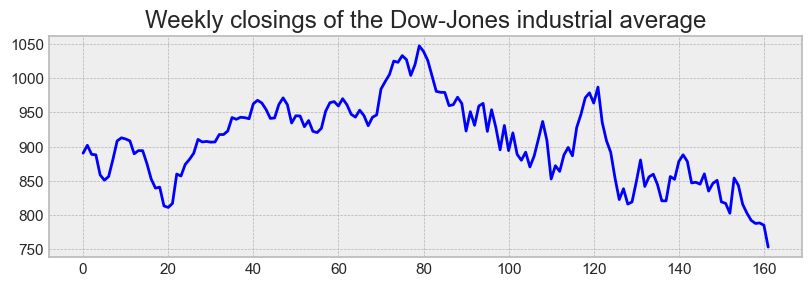

In [7]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

In [12]:
series = pd.read_csv("weekly-closings-of-the-dowjones-.csv")["Close"]

In [13]:
values = series.values.reshape(-1,1)

In [17]:
import warnings

warnings.filterwarnings('ignore')

In [19]:
for n in range(1, 8): #скоры для разного количества компонент
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -894.2620483582102
2 -820.6340922912459
3 -786.8380948745798
4 -786.680716243752
5 -743.0200926906768
6 -750.4736929537505
7 -735.2939478213168


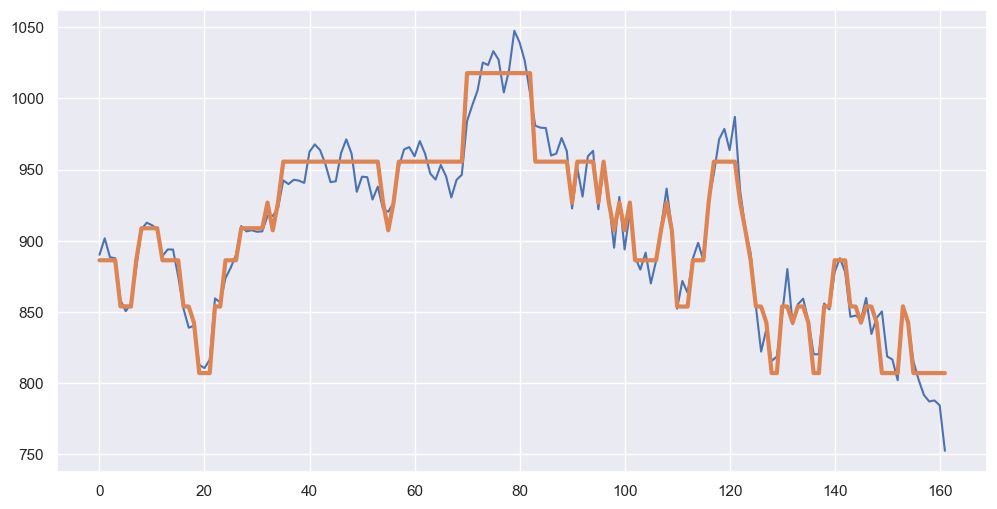

In [20]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

Эксперименты:
 * поварьировать число компонент HMM,
 * Для обучения HMM необходимо задать какое-то начальное приближение ее параметров. В этот процесс можно вмешаться с помощью явного задания априорного распределения с помощью спецификации model.transmat_. Другие параметры модели доступны по `model.<TAB>`
 * HMM обучается на основе градиентного спуска в пространстве параметров (оптимизируется правдоподобие выборки). Различные инициализации приводят (в общем случае) к различным результатам оптимизации. Попробуйте обучить набор моделей HMM для понимания, насколько устойчиво обучение. Посмотрите на model.score(X) для оценки логарифма правдоподобия обучающей выборки.
 * Число итераций, заданное для обучения, влияет на качество модели. Модель будет продолжать оптимизацию, пока не прошло n_iter шагов градиентного спуска или пока изменение score выше, чем заданный порог tol. Заметьте, что в зависимости от используемых данных модель может и не окончить оптимизацию за n_iter шагов.